$\newcommand{\spn}{\operatorname{span}}
\newcommand{\bbm}{\begin{bmatrix}}
\newcommand{\ebm}{\end{bmatrix}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\im}{\operatorname{im}}
\newcommand{\nll}{\operatorname{null}}
\newcommand{\csp}{\operatorname{col}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\tr}{\operatorname{tr}}
\newcommand{\dotp}{\!\boldsymbol{\cdot}\!}
\newcommand{\len}[1]{\lVert #1\rVert}
\newcommand{\abs}[1]{\lvert #1\rvert}
\newcommand{\proj}[2]{\operatorname{proj}_{#1}{#2}}
\newcommand{\bz}{\overline{z}}
\newcommand{\zz}{\mathbf{z}}
\newcommand{\uu}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\ww}{\mathbf{w}}
\newcommand{\xx}{\mathbf{x}}
\newcommand{\yy}{\mathbf{y}}
\newcommand{\zer}{\mathbf{0}}
\newcommand{\vecq}{\mathbf{q}}
\newcommand{\vecp}{\mathbf{p}}
\newcommand{\vece}{\mathbf{e}}
\newcommand{\basis}[2]{\{\mathbf{#1}_1,\mathbf{#1}_2,\ldots,\mathbf{#1}_{#2}\}}
\newcommand{\amp}{&}
$

# Worksheet: generalized eigenvectors

Let $V$ be a finite-dimensional vector space, and let $T:V\to V$ be a linear operator. Assume that $T$ has all real eigenvalues (alternatively, assume we're working over the complex numbers). Let $A$ be the matrix of $T$ with respect to some standard basis $B_0$ of $V\text{.}$

Our goal will be to replace the basis $B_0$ with a basis $B$ such that the matrix of $T$ with respect to $B$ is as simple as possible. (Where we agree that the "simplest" possible matrix would be diagonal.)

Recall the following results that we've observed so far:
- The characteristic polynomial $c_T(x)$ of $T$ does not depend on the choice of basis.
- The eigenvalues of $T$ are the roots of this polynomial.
- The eigenspaces $E_\lambda(T)$ are $T$-invariant subspaces of $V\text{.}$
- The matrix $A$ can be diagonalized if and only if there is a basis of $V$ consisting of eigenvectors of $T\text{.}$
- Suppose
$$
c_T(x) = (x-\lambda_1)^{m_1}(x-\lambda_2)^{m_2}\cdots (x-\lambda_k)^{m_k}\text{.}
$$
Then $A$ can be diagonalized if and only if $\dim E_{\lambda_i}(T) = m_i$ for each $i=1,\ldots, k\text{.}$

In the case where $A$ can be diagonalized, we have the direct sum decomposition
$$
V = E_{\lambda_1}(T)\oplus E_{\lambda_2}(T) \oplus \cdots \oplus E_{\lambda_k}(T)\text{.}
$$

The question is: what do we do if there aren't enough eigenvectors to form a basis of $V\text{?}$ When that happens, the direct sum of all the eigenspaces will not give us all of $V\text{.}$

The idea: replace $E_{\lambda_j}(T)$ with a **generalized eigenspace** $G_{\lambda_j}(T)$ whose dimension is $m_i\text{.}$

Our candidate: instead of $E_{\lambda}(T) = \ker(T-\lambda I)\text{,}$ we use $G_\lambda(T) = \ker((T-\lambda I)^m)\text{,}$ where $m$ is the multiplicity of $\lambda\text{.}$

## 1.
Recall that in class we proved that $\ker(T)$ and $\operatorname{im}(T)$ are $T$-invariant subspaces. Let $p(x)$ be any polynomial, and prove that $\ker (p(T))$ and $\operatorname{im}(p(T))$ are also $T$-invariant.

Hint: first show that $p(T)T=Tp(T)$ for any polynomial $T\text{.}$

### Answer
Proof: Let $p(x)$ be any polynomial. The goal is to show that $ker(p(T))$ and $im(p(T))$. We assume that $v \in ker(p(T))$. Then, by the definition of kernel, $T(v) \in ker(p(T))$. We assume that $p(T)(v) = 0$. Then $p(T)(T(v)) = 0$. This means 
$$p(T)T(v) = Tp(T)(v) = T(0) = 0$$. 

Applying the result of Problem 1 to the polynomial $p(x) = (x-\lambda)^m$ shows that $G_\lambda(T)$ is $T$-invariant. It is possible to show that $\dim G_\lambda(T)=m$ but I won't ask you to do that. (A proof is in Nicholson if you really want to see it.)

Instead, we will try to understand what's going on by exploring an example.

Consider the following matrix.

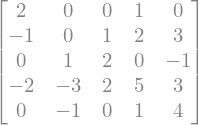

In [1]:
from sympy import *
init_printing()
A=Matrix([[2,0,0,1,0],[-1,0,1,2,3],[0,1,2,0,-1],[-2,-3,2,5,3],[0,-1,0,1,4]])
A

## 2.
Find (and factor) the characteristic polynomial of $A\text{.}$

In [5]:
charpoly = A.charpoly().as_expr()
factor(charpoly)

## 3.

Find the eigenvectors. What are the dimensions of the eigenspaces? Based on this observation, can $A$ be diagonalized?

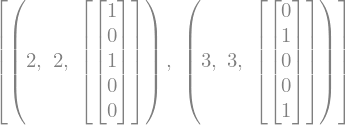

In [6]:
A.eigenvects()

### Answer: The dimensions of the eigenspaces are 1. Sean told us that A cannot be diagonalised. 

## 4.

Prove that for any $n\times n$ matrix $A\text{,}$ we have
$$
\{0\}\subseteq \operatorname{null}(A)\subseteq \operatorname{null}(A^2) \subseteq \cdots \subseteq \operatorname{null}(A^n)\text{.}
$$

**Double-click here** to edit this cell and enter text to answer question 4.

It turns out that at some point, the null spaces stabilize. If $\operatorname{null}(A^k)=\operatorname{null}A^{k+1}$ for some $k\text{,}$ then $\operatorname{null}(A^k)=\operatorname{null}(A^{k+l})$ for all $l\geq 0\text{.}$

## 5.

For each eigenvalue found in problem 2, compute the nullspaces of $A-\lambda I\text{,}$ $(A-\lambda I)^2\text{,}$ $(A-\lambda I)^3\text{,}$ etc. until you find two consecutive nullspaces that are the same.

By problem 4, any vector in $\operatorname{null}(A-\lambda I)^m$ will also be a vector in $\operatorname{null}(A-\lambda I)^{m+1}\text{.}$ In particular, at each step, we can find a basis for $\operatorname{null}(A-\lambda I)^m$ that includes the basis for $\operatorname{null}(A-\lambda I)^{m-1}\text{.}$

For each eigenvalue found in problem 2, determine such a basis for the corresponding generalized eigenspace. You will want to list your vectors so that the vectors from the basis of the nullspace for $A-\lambda I$ come first, then the vectors for the basis of the nullspace for $(A-\lambda I)^2\text{,}$ and so on.

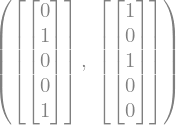

In [20]:
(A - 3*I).nullspace(), (A - 2*I).nullspace()

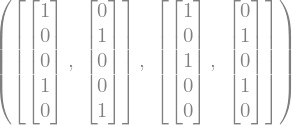

In [34]:
# squaring
x = (A - 3*I)
y = (A-2*I)
(x**2).nullspace(), (y**2).nullspace()

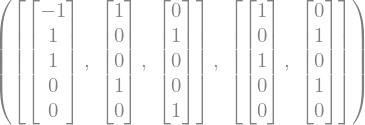

In [53]:
# cubing
X = (x**3).nullspace()
Y = (y**2).nullspace()
X, Y

## 6.
Finally, let's see how all of this works. Let $P$ be the matrix whose columns consist of the vectors found in Problem 4. What do you get when you compute the matrix $P^{-1}AP\text{?}$

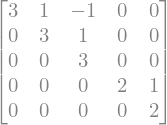

In [61]:
P = Matrix(5,5, [-1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])
Q = Matrix.hstack(X[2], X[1], X[0], Y[0], Y[1])
# P**(-1)*A*P,
Q**(-1)*A*Q